In [3]:

import torchvision.transforms.functional as F
from torchvision import transforms
import torch
import torch.nn as nn
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

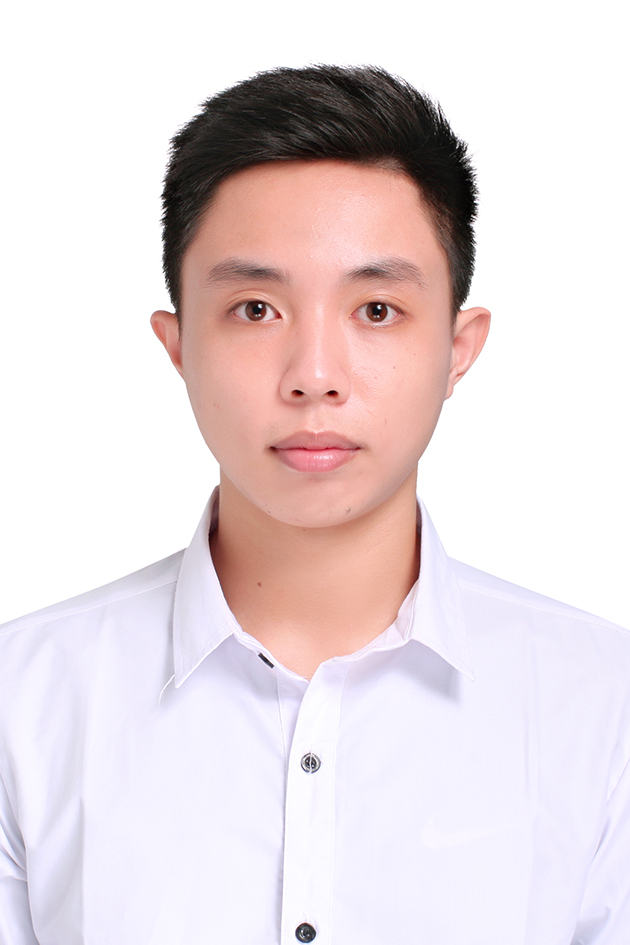

In [6]:
img = Image.open("a.jpg")
img

In [7]:
img.size

(630, 945)

In [9]:
convert = transforms.ToTensor()
row = convert(img)
row

tensor([[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [0.8745, 0.8745, 0.8706,  ..., 0.9333, 0.9373, 0.9373],
         [0.8627, 0.8745, 0.8706,  ..., 0.9373, 0.9412, 0.9412],
         [0.8627, 0.8745, 0.8706,  ..., 0.9412, 0.9412, 0.9412]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [0.8627, 0.8627, 0.8588,  ..., 0.9216, 0.9255, 0.9255],
         [0.8588, 0.8706, 0.8667,  ..., 0.9255, 0.9294, 0.9294],
         [0.8431, 0.8627, 0.8588,  ..., 0.9294, 0.9294, 0.9294]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.

In [13]:
row2 = transforms.functional.crop(row,0,0,630,630)
row2.shape

torch.Size([3, 630, 630])

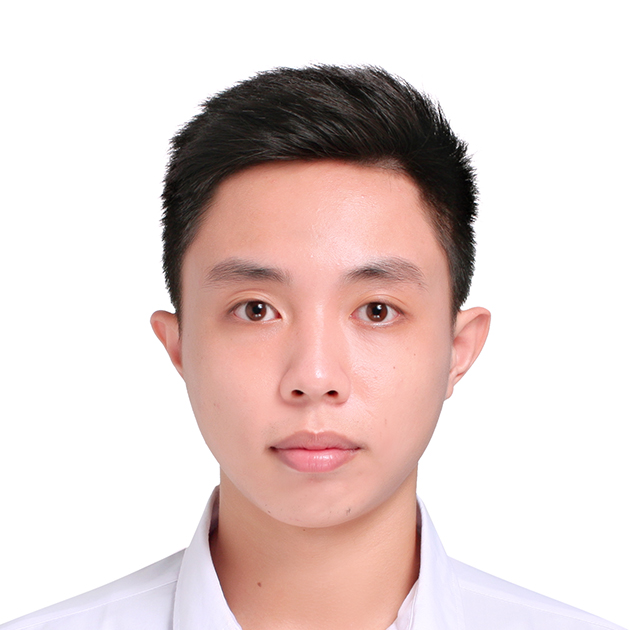

In [14]:
transform = transforms.ToPILImage()
image = transform(row2)
image

In [ ]:
# Model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        
        self.main = nn.Sequential(
            nn.Conv2d(3, 6, 3), # 630x630x3 -> 628x628x6
            nn.ReLU(),
            nn.MaxPool2d(2,2), # 628x628x6 -> 314x314x6
            nn.Conv2d(6, 16, 3), # 314x314x6 -> 312x312x16
            nn.ReLU(),
            nn.MaxPool2d(2,2), # 312x312x16 -> 156x156x16
            nn.Conv2d(16, 32, 3), # 156x156x16-> 154x154x32
            nn.ReLU(),
            nn.MaxPool2d(2,2), # 154x154x32-> 77x77x32 
                
            nn.Flatten(2*2*32, 1),    
            nn.Linear(2*2*32, 80),
            nn.Sigmoid(),
            nn.Linear(80, 32),
            nn.Sigmoid(),
            nn.Linear(32, 10),
            nn.Softmax(),           
        )
    def forward(self, x):
        return self.main(x) 
conv = nn.Conv2d()
model = NeuralNetwork()
result.size()


torch.Size([3, 419, 746])

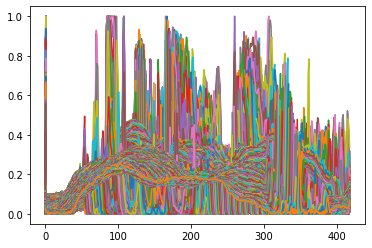

In [ ]:
from matplotlib import pyplot as plt
def img_show(result):
    dev_x, dev_y, dev_z = result

    plt.plot(dev_x, dev_y, dev_z)
    plt.show()
img_show(result)


In [ ]:
class Net_MNIST(nn.Module): # MNIST
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 3)  
        self.conv2 = nn.Conv2d(6, 16, 3, padding=1) # 14x14 -> 12x12
        self.pool = nn.MaxPool2d(2, 2)  
        
        self.fc1 = nn.Linear(576, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) # 28x28 -> 26x26 -> 13x13
        x = self.pool(F.relu(self.conv2(x))) # 14x14 (padding = 1)-> 12x12 -> 6x6
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x

class Net_CIFAR10(nn.Module): # CIFAR10
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)  
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.conv3 = nn.Conv2d(16, 32, 3)
        self.pool = nn.MaxPool2d(2, 2)  
        
        self.fc1 = nn.Linear(128, 80)
        self.fc2 = nn.Linear(80, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x))) # 32x32 -> 28x28 -> 14x14
        x = self.pool(F.relu(self.conv2(x))) # 14x14 -> 12x12 -> 6x6
        x = self.F.relu(self.conv3(x)) # 4x4 -> 2x2
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x
    
class VGG_16(nn.Module): # VGG_16
    def __init__(self, in_features):
        super().__init__()
        
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_features, 64, 3, padding=2), # equal size
            nn.ReLU(),
            nn.Conv2d(in_features, 64, 3, padding=2), # equal size
            nn.ReLU()
        )
        self.block_2 = nn.Sequential(
            nn.MaxPool2d(2, 2),
            nn.Conv2d(64, 128, 3, padding=2), # equal size
            nn.ReLU(),
            nn.Conv2d(64, 128, 3, padding=2), # equal size
            nn.ReLU()
        )
        self.block_3 = nn.Sequential(
            nn.MaxPool2d(2, 2),
            nn.Conv2d(128, 256, 3, padding=2), # equal size 
            nn.ReLU(),
            nn.Conv2d(128, 256, 3, padding=2), # equal size 
            nn.ReLU(),
            nn.Conv2d(128, 256, 3, padding=2), # equal size 
            nn.ReLU()
        )
        self.block_4 = nn.Sequential(
            nn.Conv2d(256, 512, 3, padding=2), # equal size
            nn.ReLU()
        )
        pass

In [1]:
def S(n):
    if n == 1:
        return 1
    else:
        return (-1)**(n+1)*1/n*S(n)

In [2]:
S(4)

: 

: 